# imports

In [2]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Defining initial values for h, s, v

In [3]:
h1 = 0
h2 = 360
s1 = 0
s2 = 10
v1 = 245
v2 = 255

# Functions

In [4]:
def Cards_only(image ):
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)


    lower_bound = np.array([h1 , s1, v1])
    upper_bound = np.array([h2 , s2 , v2])

    mask = cv.inRange(hsv_image, lower_bound, upper_bound)

    masked_image= cv.bitwise_and(image, image, mask=mask)
    
    return masked_image

# Loading Image

In [5]:
img = cv.resize(cv.imread('./cards/9B6hJ.jpg') , (0,0), fx=0.3, fy=0.3)

# Testing different methods of detecting white color

In [6]:
# cv.imshow( "original", img)
# cv.imshow( "whiteOnly", white_only(cv.GaussianBlur(img , (5,5) , 1)))
# cv.imshow("med" , cv.medianBlur(white_only(img) , 3))
# cv.imshow("gaussian" , cv.GaussianBlur(white_only(img) , (3,3) , 2))
# cv.waitKey(0)
# cv.destroyAllWindows()

# Tuning Global boundaries h, s ,v until reaching optimum solution

In [7]:
h1 = 0
h2 = 360
s1 = 0
s2 = 25
v1 = 150
v2 = 255

In [8]:
cards_only = cv.cvtColor(Cards_only(cv.GaussianBlur(img , (5,5) , 1)) , cv.COLOR_BGR2GRAY)
result = img.copy()

# Cards Detection

In [9]:
contours, _ = cv.findContours(cards_only, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)


print(f"Number of contours {len(contours)}")

# cv.drawContours(result, contours, -1, (255, 0, 0), 3)
# cv.imshow('original', img)
# cv.imshow('contours', result)
# cv.waitKey(0)
# cv.destroyAllWindows()

Number of contours 10


# Displaying Cards one by one

In [ ]:
for contour in contours:

    mask = np.zeros(img.shape[:2], np.uint8)
    
    cv.drawContours(mask, [contour],-1, 255, -1)

    masked = cv.bitwise_and(img, img, mask=mask)

    fig= plt.figure(figsize=(10,20))
    plt.subplot(121)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.title("mask")
    
    plt.subplot(122)
    plt.imshow(masked, cmap='gray')
    plt.axis('off')
    plt.title("masked")
    plt.show()    

    

# Again for the next photo

In [15]:
img = cv.resize(cv.imread('./cards/Ttpvb.jpg') , (0,0), fx=0.3, fy=0.3)
cards_only = cv.cvtColor(Cards_only(cv.GaussianBlur(img , (5,5) , 1)) , cv.COLOR_BGR2GRAY)
contours, _ = cv.findContours(cards_only, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)


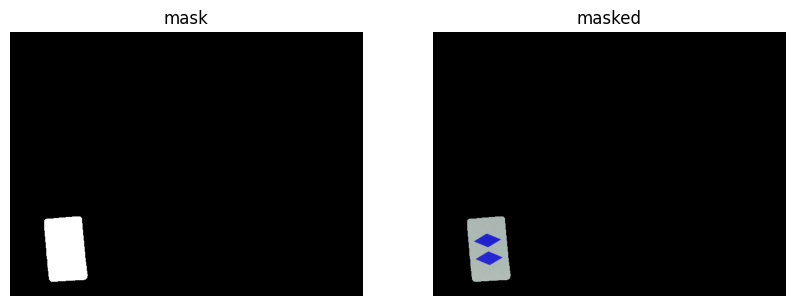

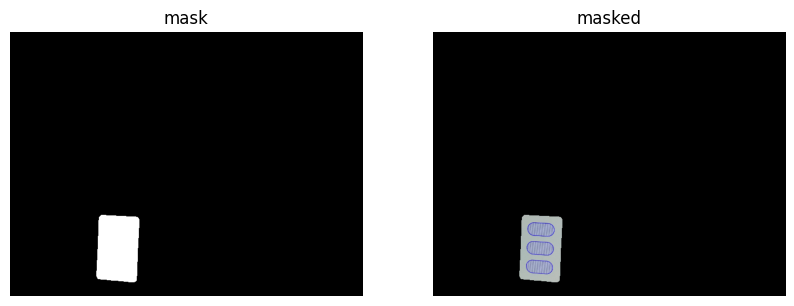

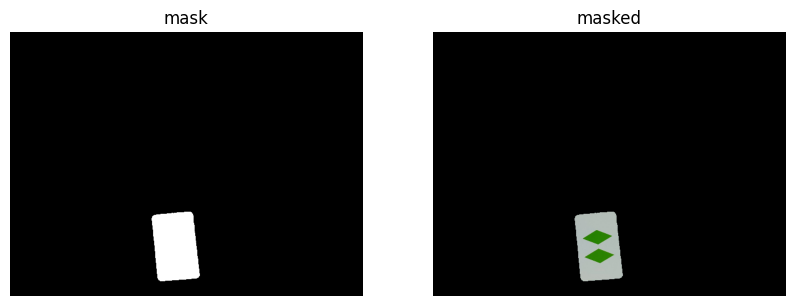

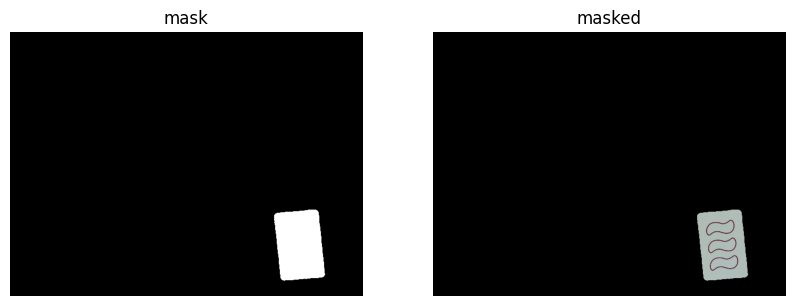

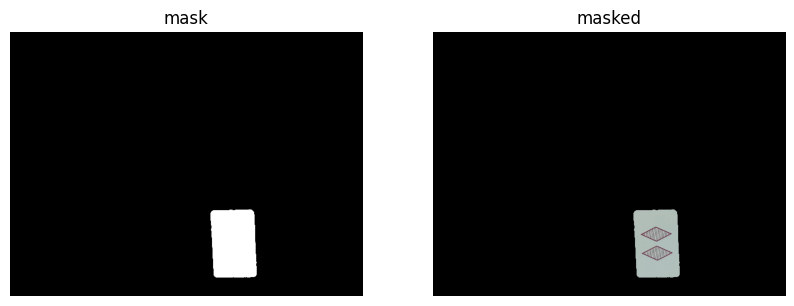

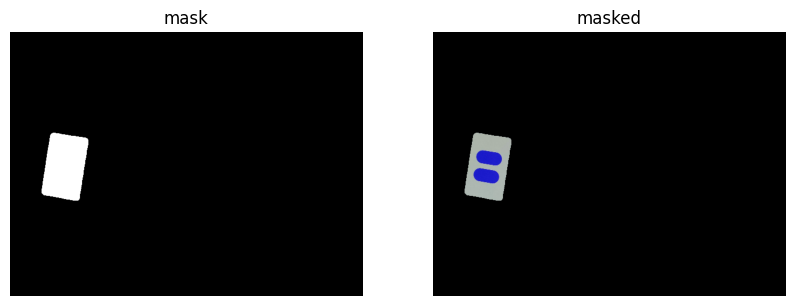

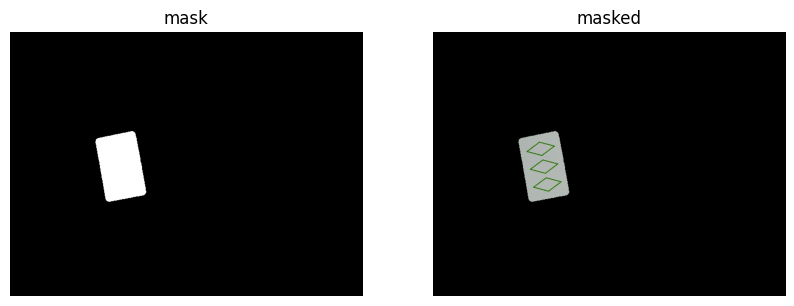

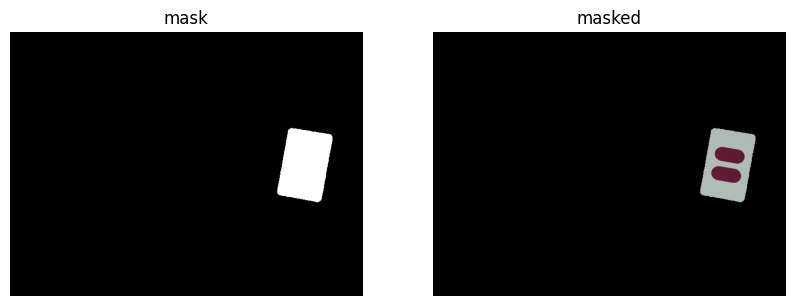

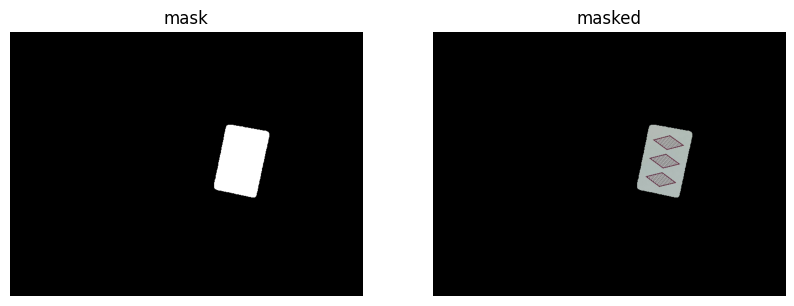

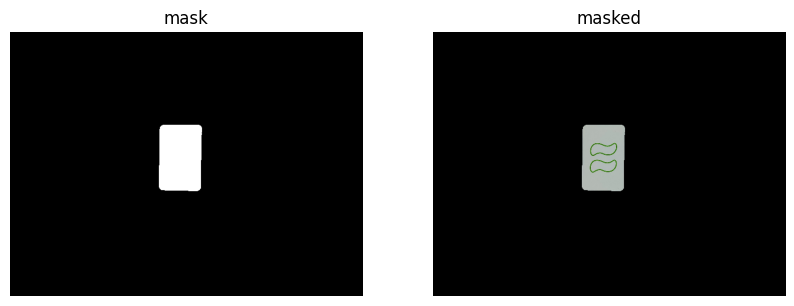

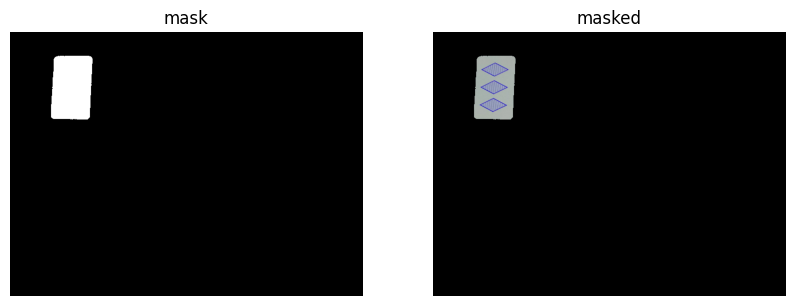

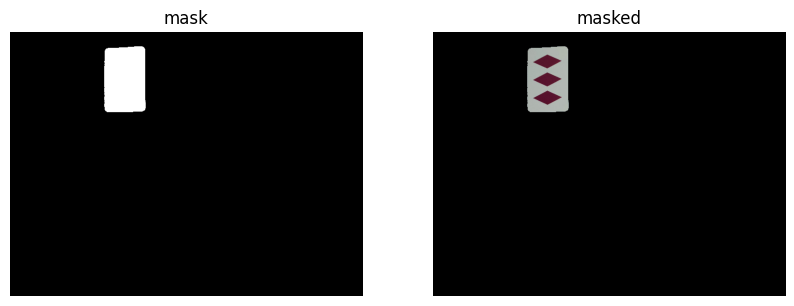

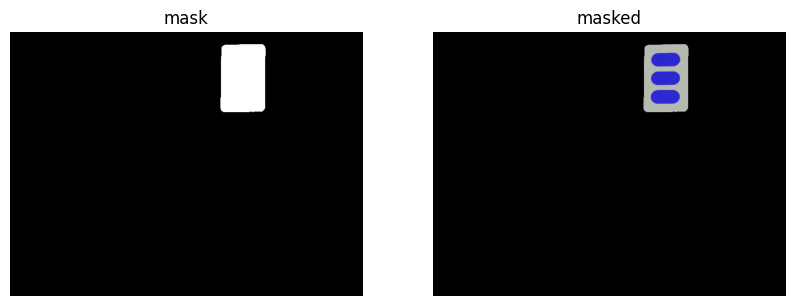

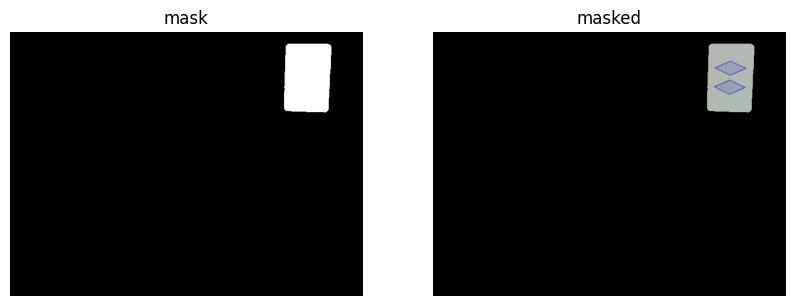

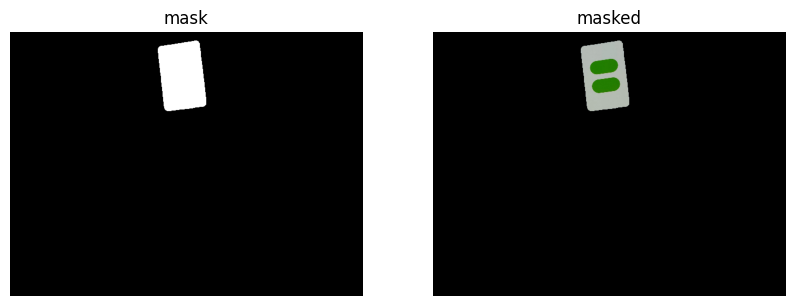

In [16]:
for contour in contours:
    
    mask = np.zeros(img.shape[:2], np.uint8)
    
    cv.drawContours(mask, [contour],-1, 255, -1)

    masked = cv.bitwise_and(img, img, mask=mask)

    fig= plt.figure(figsize=(10,20))
    plt.subplot(121)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.title("mask")
    
    plt.subplot(122)
    plt.imshow(masked, cmap='gray')
    plt.axis('off')
    plt.title("masked")
    plt.show()    
